In [ ]:
try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

BeautifulSoup and Pandas are already installed and imported


In [ ]:
import requests
import re
all_data = []
urls = ['https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2009', 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2010', 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2011', 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2012', 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2013', 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2014', 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2015', 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2016', 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2017', 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2018','https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2019','https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2020', 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2021', 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_2022']
for url in urls:
  response = requests.get(url)
  print ("Webpage opened successfully...")

  # print(response.content)

  bs = BeautifulSoup(response.content, "html.parser")
  print ("Webpage loaded and parsed successfully...")

  raw_data = []

  table = bs.find_all("table")

  for row in table:
      line = row.text
      raw_data.append(line)

  column_names = ["No.", "Issue Date", "Song", "Artist(s)", "Ref."]
  final_data = []

  first_table = raw_data[1]
  rows = first_table.split('\n\n\n')

  weeks = 0
  for row in rows:
    weeks += 1

    column = row.split('\n\n')
    if (len(column) == len(column_names)-1) or (len(column) == len(column_names)):
        if len(final_data) != 0:
            final_data[-1][5] = weeks
        if len(column) == len(column_names):
            artist_name = column[3]
        else:
            column.insert(3, artist_name)
        column.insert(5, weeks)
        month = re.split(r'\W+', column[1])
        column.insert(1, month[0])
        column[2] = month[1]
        final_data.append(column)
        weeks = 0


  final_data[-1][5] = weeks + 1
  print(final_data)

  column_names = ["No.", "Issue Month", "Issue Date", "Song", "Artist(s)", "Ref.", "Weeks"]
  df = pandas.DataFrame(final_data[1:], columns = column_names)
  df = df.dropna()
  all_data.append(df)

newDF = pandas.concat(all_data)
newDF.to_csv('All_BB100_Wikipedia.csv')

Webpage opened successfully...
Webpage loaded and parsed successfully...
[['re', 'January', '3', '"Single Ladies (Put a Ring on It)"', 'Beyoncé', 2, 2], ['968', 'January', '17', '"Just Dance"', "Lady Gaga featuring Colby O'Donis", 3, 2], ['969', 'February', '7', '"My Life Would Suck Without You"', 'Kelly Clarkson', 2, 3], ['970', 'February', '21', '"Crack a Bottle"', 'Eminem, Dr. Dre and 50 Cent', 1, 2], ['971', 'February', '28', '"Right Round"', 'Flo Rida', 6, 1], ['972', 'April', '11', '"Poker Face"', 'Lady Gaga', 1, 6], ['973', 'April', '18', '"Boom Boom Pow"†', 'The Black Eyed Peas', 12, 1], ['974', 'July', '11', '"I Gotta Feeling"', 'The Black Eyed Peas', 14, 12], ['975', 'October', '17', '"Down"', 'Jay Sean featuring Lil Wayne', 1, 14], ['976', 'October', '24', '"3"', 'Britney Spears', 1, 1], ['re', 'October', '31', '"Down"', 'Jay Sean featuring Lil Wayne', 1, 1], ['977', 'November', '7', '"Fireflies"', 'Owl City', 1, 1], ['978', 'November', '14', '"Whatcha Say"', 'Jason Derulo',

For my data collection process, I decided to use the Billboard top songs from 2009 to 2022 pulled from Wikipedia. However, each year only revealed ahout 30-40 rows of data so I used 13 years of data to combine into one csv file.

 My method of collecting data was web scraping which means that I downloaded the data from Wikipedia. The, using Beautiful Soup, I extracted the data. For tranformation, I iterarted through each row from each year of data. I counded how manyv weeks a song stayed on the charts and added that as a column, I also split the issue date by month and data whihc added another column. Lastly, I loaded the 230 rows of data onto a new csv file.

Text(0.5, 1.0, "Top 20 Artists vs. How Many Songs They've Had on The Charts (2009-2022)")

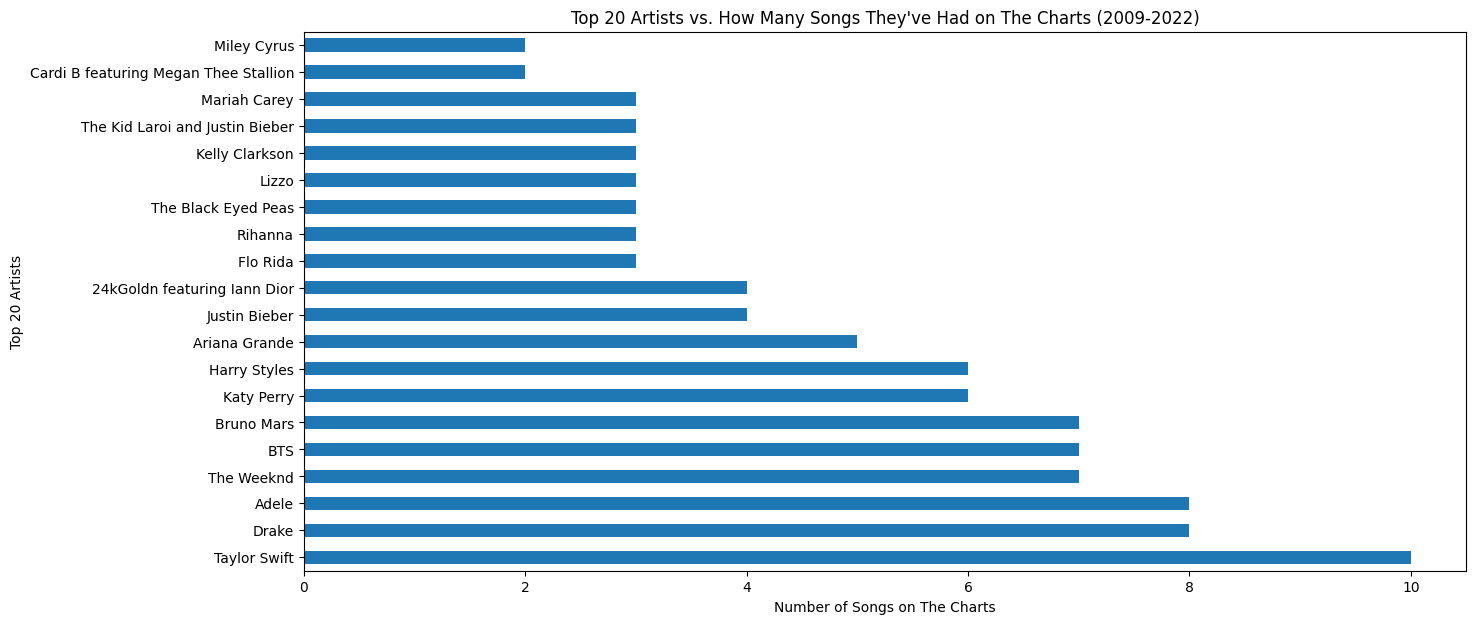

In [15]:
import matplotlib.pyplot as plt
df = pandas.read_csv('All_BB100_Wikipedia.csv')

artists = df['Artist(s)']
frequency = artists.value_counts(sort = True)


frquency = frequency.to_list()
frequency = frequency.nlargest(20, keep='first')

plt.figure(figsize = (15,7))
frequency.plot.barh()
plt.xlabel("Number of Songs on The Charts")
plt.ylabel("Top 20 Artists")
plt.title("Top 20 Artists vs. How Many Songs They've Had on The Charts (2009-2022)")

For my first visualization, I chose to to make a bar graph comparing the overall top 20 artists from 2009 to 2022 with the number of songs they've had on the charts.

I noticed that Taylor Swift had the most songs on the charts in the 13 year period with 10 songs. Miley Cyrus and Cardi B/Megan Thee Stallion had the least number of songs on the charts with 2 songs.

This data is honestly very surprising because Taylor Swift has grown to be one of the biggest artists and she released an alnum in 2022 which I assume would only increase the number of songs on the Billboard Charts.

I'm also surprised by Miley Cyrus's data as well because in the late 2000s and early 2010s, she was very popular and became independant to her career with Disney. However, I'm not surprised that Cardi B and Megan Thee STallion are that low on the top 20 charts because they are both new solo artists who recently beacme popular in 2019/2020.

Text(0.5, 1.0, 'Number of Songs on The Charts For Each Month (2009-2022)')

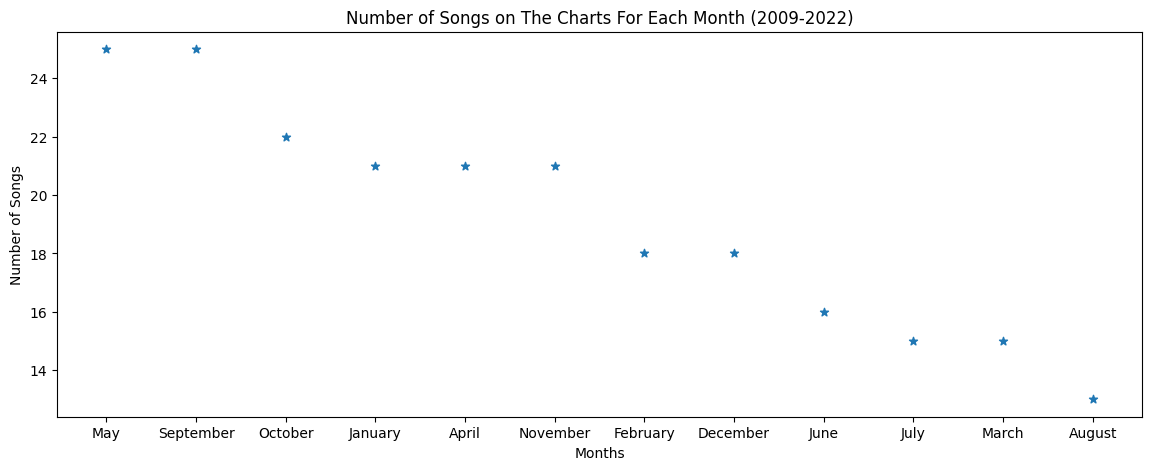

In [16]:
from matplotlib import pyplot as plt
df = pandas.read_csv('All_BB100_Wikipedia.csv')
most_Months = df['Issue Month']
frequency = most_Months.value_counts(sort = True)
newDF = frequency.reset_index()
newDF.columns = ['Issue Month', 'Songs']
months_array = newDF['Issue Month'].values
songs_array = newDF['Songs'].values
plt.figure(figsize = (14,5))
plt.scatter(months_array, songs_array, marker="*")
plt.ylabel("Number of Songs")
plt.xlabel("Months")
plt.title("Number of Songs on The Charts For Each Month (2009-2022)")


For my second visualization, I decided to create a scatter plot that shows what months typically had the most songs on the Billboard charts from 2009 to 2022.

May and September had the most songs with about 28 songs over the 13 years and August had the least amount of songs over the 13 years with about 8 songs.

 This data surpised me because September and August are right next to eachoter yet they're on completely oppositw sides of this graph. I'm also surprised because I notice that artists release their albums in the fall months but announce them in the spring/summer months. This comfuses me because There is a major decline between each fall months.

Text(0.5, 1.0, 'How Many Weeks a Song Stays on The Charts')

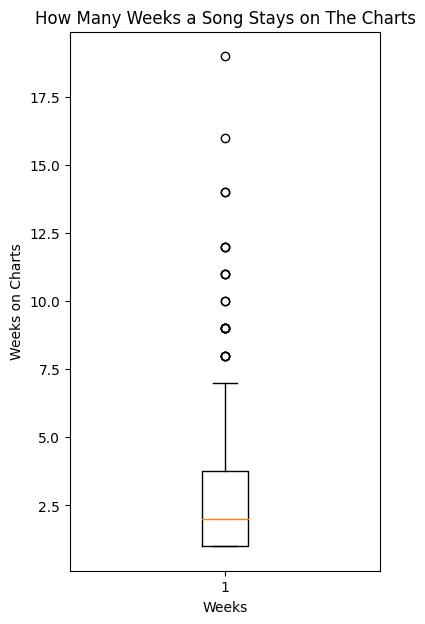

In [20]:
from matplotlib import pyplot as plt
df = pandas.read_csv('All_BB100_Wikipedia.csv')
weeks_onCharts = df['Weeks']

plt.figure(figsize = (4,7))
plt.boxplot(weeks_onCharts)
plt.ylabel("Weeks on Charts")
plt.xlabel("Weeks")
plt.title("How Many Weeks a Song Stays on The Charts")

Lastly, I chose a box plot for my third visualization. This graph shows the the average, min, and max weeks a song has stayed on the Billboard charts from 2009 to 2022.

The shortest a song has stayed on the charts is about 1.5 weeks or less. The longest a song has stayed on the Billboard charts is about 7 weeks. The average legnth of a song on the charts is about 2.5 weeks. There are a couple outliers ranging from 7.5 weeks to 19 weeks. There are 8 outliers that indicate that they stay at an abnormal lenghth (longer than the minimum) than the rest of the songs in the pool.

Something I find surprising in this data is that the average a song has stayed on the charts is 2.5 weeks instead of longer. I thinnk the minimum makes sense but the qmaximum should be higher. I think that with the number of songs I pulled this data from, the data within the box plot would range at least 11 weeks instead of 5.